In [25]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [33]:
from pyTVDN import TVDNDetect, TVDNRankTuning
from pathlib import Path
from scipy.io import loadmat
from scipy.signal import detrend
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.signal import lfilter, firls, decimate
from tqdm import tqdm_notebook as tqdm
from easydict import EasyDict as edict
from collections import Counter
import pickle

In [27]:
resDir = Path("../results")
dataDir = Path("../data")

filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

saveDir = resDir/"fMRIHPFs_fixnchg5"
if not saveDir.exists():
    saveDir.mkdir()

In [28]:
fs = 0.5 #sampling frequency
fmin = 0.009 # 
fmax = 0.08
hbp = firls(21, np.array([0, 0.009, 0.01, 0.08, 0.09, 0.8]), #0.8
           desired = np.array([0, 0, 1, 1, 0, 0]))

num = fMRIs.shape[-1]
fMRIsHPF = []
for i in range(num):
    cfMRI = fMRIs[0, i]["fMRI"][:90, :]
    # detrend
    cfMRI = detrend(cfMRI)
    chpffMRI = lfilter(hbp, 1, cfMRI)
    fMRIsHPF.append(chpffMRI[:, 25:])

### First method

In [29]:
#Lmin = 4
#lamb = 8e-5
#kappas = np.arange(1, 4, 0.01)
#ranks = [2, 4, 6, 8, 10, 12]
#
#cErr = np.inf
#cOptKappa = None
#ResObjs = None
#cOptRank = None
#for cRank in ranks:
#    numChgsAll = []
#    DetObjs = []
#    for ii in tqdm(range(243)):
#        Ymat = fMRIsHPF[ii]
#        DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
#                          saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=cRank)
#        DetRec()
#        DetRec.TuningKappa(kappas)
#        
#        DetObjs.append(DetRec)
#        numChgsAll.append(DetRec.numchgs)
#        
#    numChgsArr = np.array(numChgsAll)
#    idx = np.argmin(np.sum((numChgsArr - 5)**2, axis=0))
#    optKa = kappas[idx]
#    
#    # Update det obj
#    errs = []
#    for DetObj in DetObjs:
#        DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
#        errs.append(DetObj.GetCurMSE())
#    err = np.mean(errs)
#    print(f"The current error of rank {cRank} is {err:.3f}, and kappa is {optKa:.3f}.")
#    if cErr > err:
#        ResObjs = DetObjs
#        cErr = err
#        cOptKappa = optKa
#        cOptRank = cRank
#        
#result = edict()
#result.DetObjs = ResObjs
#result.Err = cErr
#result.rank = cOptRank
#result.kappa = cOptKappa

#with open(saveDir/"fMRIResultFixnchg5.pkl", "wb") as f:
#    pickle.dump(result, f)
with open(saveDir/"fMRIResultFixnchg5.pkl", "rb") as f:
    result = pickle.load(f)

### Second method 

In [41]:
#Lmin = 4
#lamb = 8e-5
#kappas = np.arange(1, 4, 0.01)
#ranks = [2, 4, 6, 8, 10, 12]
#
#cErr = np.inf
#cOptKappa = None
#ResObjs = None
#cOptRank = None
#for cRank in ranks:
#    numChgsAll = []
#    DetObjs = []
#    for ii in tqdm(range(243)):
#        Ymat = fMRIsHPF[ii]
#        DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
#                          saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=cRank)
#        DetRec()
#        DetRec.TuningKappa(kappas)
#        
#        DetObjs.append(DetRec)
#        numChgsAll.append(DetRec.numchgs)
#        
#    numChgsArr = np.array(numChgsAll)
#    meanChgs = numChgsArr.mean(axis=0)
#    varChgs = numChgsArr.var(axis=0)
#    subVarChgs = varChgs[np.logical_and(meanChgs<=6, meanChgs>=4)]
#    subKappas = kappas[np.logical_and(meanChgs<=6, meanChgs>=4)]
#    optKa = subKappas[np.argmin(subVarChgs)]
#    
#    # Update det obj
#    errs = []
#    for DetObj in DetObjs:
#        DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
#        errs.append(DetObj.GetCurMSE())
#        
#    err = np.mean(errs)
#    print(f"The current error of rank {cRank} is {err:.3f}, and kappa is {optKa:.3f}.")
#    
#    cResult = edict()
#    cResult.DetObjs = DetObjs 
#    cResult.Err = err
#    cResult.rank = cRank
#    cResult.kappa = optKa
#    with open(saveDir/f"fMRIResultMinVar_rank{cRank}.pkl", "wb") as f:
#        pickle.dump(cResult, f)
#        
#    if cErr > err:
#        ResObjs = DetObjs
#        cErr = err
#        cOptKappa = optKa
#        cOptRank = cRank
#        
#result = edict()
#result.DetObjs = ResObjs
#result.Err = cErr
#result.rank = cOptRank
#result.kappa = cOptKappa

#with open(saveDir/"fMRIResultMinVar.pkl", "wb") as f:
#    pickle.dump(result, f)
    
with open(saveDir/"fMRIResultMinVar.pkl", "rb") as f:
    result2 = pickle.load(f)

### Results

Text(0, 0.5, 'Percentage')

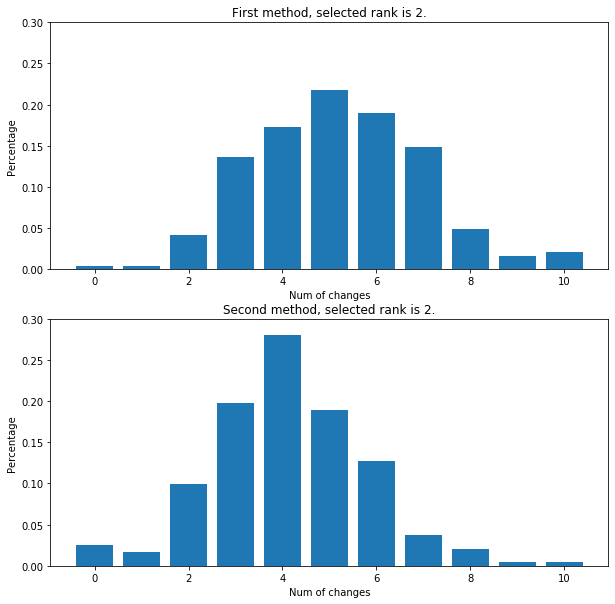

In [48]:
numChgs = []
for resObj in result.DetObjs:
    numChgs.append(len(resObj.ecpts))
numChgsCT = Counter(numChgs)

keys = sorted(list(numChgsCT.keys()))
numChgsList = [numChgsCT[key] for key in keys]

plt.figure(figsize=[10, 10])

plt.subplot(211)
plt.bar(keys, np.array(numChgsList)/243)
plt.ylim([0, 0.3])
plt.title("First method, selected rank is 2.")
plt.xlabel("Num of changes")
plt.ylabel("Percentage")

numChgs = []
for resObj in result2.DetObjs:
    numChgs.append(len(resObj.ecpts))
numChgsCT = Counter(numChgs)

keys = sorted(list(numChgsCT.keys()))
numChgsList = [numChgsCT[key] for key in keys]

plt.subplot(212)
plt.bar(keys, np.array(numChgsList)/243)
plt.title("Second method, selected rank is 2.")
plt.ylim([0, 0.3])
plt.xlabel("Num of changes")
plt.ylabel("Percentage")